In [5]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import adam_v2

import rbf_layer
from rbf_layer import InitCentersRandom, InitCentersKMeans, RBFLayer

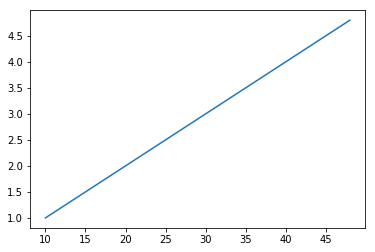

[3.]
Epoch 1/500
5/5 [==============================] - 0s 997us/step - loss: 0.7420 - accuracy: 0.0500
Epoch 2/500
5/5 [==============================] - 0s 500us/step - loss: 0.6445 - accuracy: 0.0500
Epoch 3/500
5/5 [==============================] - 0s 499us/step - loss: 0.5808 - accuracy: 0.0500
Epoch 4/500
5/5 [==============================] - 0s 751us/step - loss: 0.5285 - accuracy: 0.0500
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.0500
Epoch 6/500
5/5 [==============================] - 0s 753us/step - loss: 0.4427 - accuracy: 0.0500
Epoch 7/500
5/5 [==============================] - 0s 749us/step - loss: 0.4056 - accuracy: 0.0500
Epoch 8/500
5/5 [==============================] - 0s 999us/step - loss: 0.3717 - accuracy: 0.0500
Epoch 9/500
5/5 [==============================] - 0s 880us/step - loss: 0.3403 - accuracy: 0.0500
Epoch 10/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3115 - accuracy: 0.0500
Epoch 11

In [194]:
X = np.arange(10, 50, 2).reshape(-1,1)

y = np.arange(1, 5, 0.2).reshape(-1,1)

plt.plot(X,y)
plt.show()
X_test = np.array([30]).reshape(-1,1)
dt_reg = DecisionTreeRegressor(max_depth=6)
dt_reg.fit(X,y)

ypred = dt_reg.predict(X_test)
print(ypred)

from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
# X_test = MinMaxScaler().fit_transform(X_test)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

# print(X)
# print(y)
model = Sequential()
rbflayer = RBFLayer(10,
                        initializer=InitCentersKMeans(X),
                        betas=1,
                        input_shape=(len(X[0]),))
model.add(rbflayer)
model.add(Dense(20))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))
model.compile(optimizer= tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
history1 = model.fit(X, y, epochs=500, batch_size=4)
y_pred = model.predict(X_test)
# print(y_pred)
print(ohe.inverse_transform(y_pred))

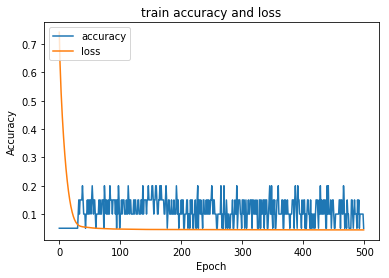

In [195]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('train accuracy and loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()